In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
df = pd.read_csv('Merged10yrdata.csv', low_memory=False)

# Fill missing operator values with 'N/A' and remove them
df = df.copy()  # Ensure we're modifying the original DataFrame
df['Operator'] = df['Operator'].fillna('N/A')  # Assign explicitly instead of using inplace=True
df = df[~df['Operator'].isin(['N/A', 'Not reported', 'Unknown', 'Private', 'Private Individual', 'Pilot', 'Not Provided by Authority'])]

df.head(10)

,NtsbNo,EventType,Mkey,EventDate,City,State,Country,ReportNo,N#,SerialNumber,...,FAR,AirCraftDamage,WeatherCondition,Operator,BroadPhaseofFlight,ReportStatus,RepGenFlag,MostRecentReportType,DocketUrl,ReportUrl
1,WPR15CA073,ACC,90556,2015-01-01T17:07:00Z,Yuma,Arizona,United States,NaN,N2841N,13102,...,91,Substantial,VMC,ROVEY JAMES A,Takeoff,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90556,https://data.ntsb.gov/carol-repgen/api/Aviatio...
2,ERA15CA093,ACC,90576,2015-01-01T17:30:00Z,Apalachicola,Florida,United States,NaN,N657MC,4622007,...,91,Substantial,VMC,CHICOLA MONTY V,Taxi,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90576,https://data.ntsb.gov/carol-repgen/api/Aviatio...
4,ERA15CA118,ACC,90685,2015-01-02T18:30:00Z,Eustis,Florida,United States,NaN,N516VB,TTS61,...,91,Substantial,VMC,"Lake Hoppers Air Adventures, Inc.",Landing,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90685,https://data.ntsb.gov/carol-repgen/api/Aviatio...
5,ERA15FA088,ACC,90558,2015-01-02T18:55:00Z,Kuttawa,Kentucky,United States,NaN,N81291,34-8070037,...,91,Substantial,IMC,FRO-GUTZ AIR LLC,Enroute,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90558,https://data.ntsb.gov/carol-repgen/api/Aviatio...
6,ERA15LA090,ACC,90569,2015-01-03T11:15:00Z,Key West,Florida,United States,NaN,N2534X,P206-0034,...,135,Substantial,VMC,Exec Air Inc.,Approach,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90569,https://data.ntsb.gov/carol-repgen/api/Aviatio...
9,WPR15LA077,ACC,90565,2015-01-03T17:50:00Z,Fresno,California,United States,NaN,N2948U,17250548,...,91,Substantial,VMC,GRAHAM ROBERT A,Enroute,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90565,https://data.ntsb.gov/carol-repgen/api/Aviatio...
10,WPR15CA078,ACC,90566,2015-01-04T11:15:00Z,Sedona,Arizona,United States,NaN,N3811M,28R-35200,...,91,Substantial,VMC,D I V A 1336 LLC,Landing,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90566,https://data.ntsb.gov/carol-repgen/api/Aviatio...
11,WPR15CA076,ACC,90564,2015-01-04T13:40:00Z,Angwin,California,United States,NaN,N907Q,CD-374,...,91,Substantial,VMC,JARSCHKE REINHARD,Landing,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90564,https://data.ntsb.gov/carol-repgen/api/Aviatio...
13,CEN15CA097,ACC,90572,2015-01-05T16:35:00Z,Marquette,Michigan,United States,NaN,N6591H,17265501,...,91,Substantial,VMC,MARQUETTE COUNTY FLYING CLUB INC,Takeoff,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90572,https://data.ntsb.gov/carol-repgen/api/Aviatio...
14,ERA15LA094,ACC,90582,2015-01-06T14:30:00Z,Norfolk,Virginia,United States,NaN,N2102P,172S9594,...,91,Substantial,VMC,Eads Flight School,Initial Climb,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90582,https://data.ntsb.gov/carol-repgen/api/Aviatio...


In [106]:
# Count accidents per operator
df['Operator'] = df['Operator'].str.strip()  # Removes leading/trailing whitespace
df['Operator'] = df['Operator'].str.replace('\t', '', regex=False)  # Removes tabs
df['Operator'] = df['Operator'].str.lower()  # Convert to lowercase for consistency

df['Operator'] = df['Operator'].replace({
    'united airlines': 'united airlines',
    'united airlines inc': 'united airlines',
    'united air lines inc': 'united airlines', 
    'southwest airlines co': 'southwest airlines',
    'delta air lines': 'delta airlines',
    'delta air lines inc': 'delta airlines',
    'delta air lines, inc': 'delta airlines',
    'delta airlines inc': 'delta airlines',
    'delta airlines, inc.': 'delta airlines',
    'delta airlines inc': 'delta airlines',
    'american airlines': 'american airlines',
    'american airlines inc': 'american airlines',
    'ryanair': 'ryanair',
    'ryan air': 'ryanair',
    'civil air patrol': 'civil air patrol',
    'civil air patrol inc': 'civil air patrol',
    'air methods corp': 'air methods',
    'air methods corporation': 'air methods',
    'indigo': 'indigo',
    'indigo air': 'indigo', 
    'jetblue airways': 'jetblue airways',
    'jetblue airways corp': 'jetblue airways',
    'jetblue corp': 'jetblue airways',
    'spirit airlines inc': 'spirit airlines',
    'spirit airlines': 'spirit airlines'
}, regex=True)

df['Operator'] = df['Operator'].str.title()

accident_counts = df['Operator'].value_counts()
accident_counts = accident_counts[accident_counts > 4] 
print(accident_counts)

Operator
United Airlines                             69
American Airlines                           57
Southwest Airlines                          47
Delta Airlines                              33
Delta Airlines Inc                          29
Ryanair                                     27
Civil Air Patrol                            22
Air Methods                                 17
Indigo                                      15
British Airways                             12
Aeromexico                                  11
Jetblue Airways                             11
Air Canada                                  10
Spirit Airlines                              9
Us Aviation Group Llc                        9
Air Evac Ems Inc                             9
Royal Air Maroc                              8
Mf Helicopters Llc                           8
Skywest Airlines Inc                         8
Singapore Airlines                           8
United Parcel Service Co                     7
Qata

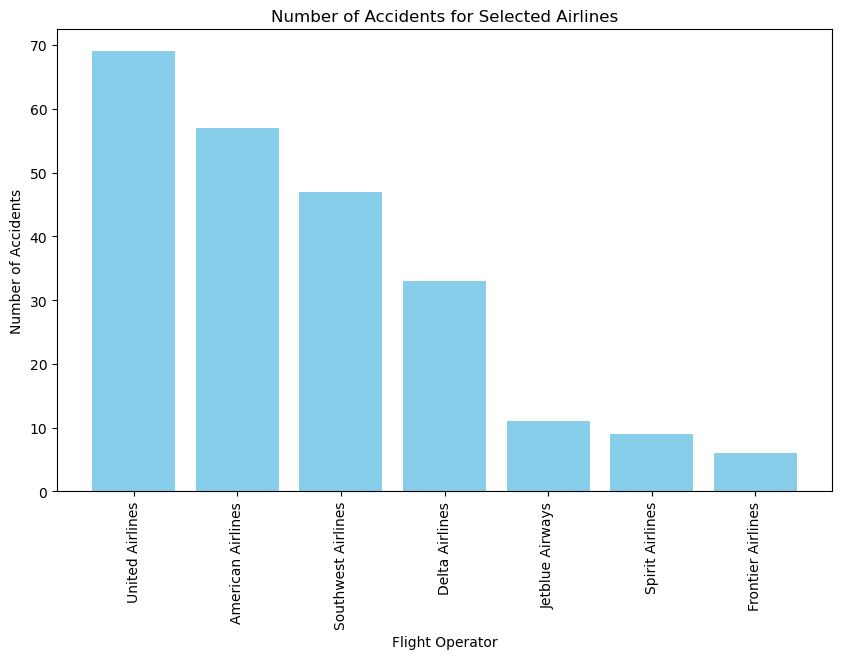

In [108]:
# Define the operators you want to focus on
selected_operators = ['Delta Airlines', 'American Airlines', 'Southwest Airlines', 'Frontier Airlines', 'Spirit Airlines', 'United Airlines', 'Jetblue Airways']
# Filter the data to include only the selected operators
filtered_data = df[df['Operator'].isin(selected_operators)]

# Count accidents per operator for the filtered data
select_accident_counts = filtered_data['Operator'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust the size of the figure
plt.bar(select_accident_counts.index, select_accident_counts.values, color='skyblue')
plt.xlabel('Flight Operator')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents for Selected Airlines')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility
plt.show()

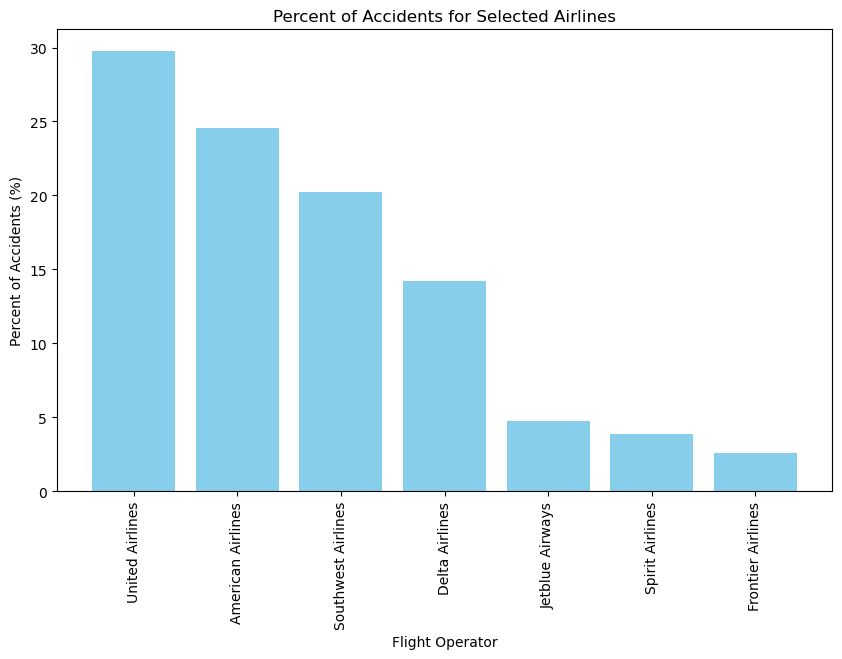

In [110]:
# Calculate the total number of accidents for the selected operators
total_accidents = select_accident_counts.sum()

# Calculate the percentage for each operator
select_accident_percentages = (select_accident_counts / total_accidents) * 100

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust the size of the figure
plt.bar(select_accident_percentages.index, select_accident_percentages.values, color='skyblue')
#plt.bar(accident_counts.index, accident_counts.values, color='skyblue')
plt.xlabel('Flight Operator')
plt.ylabel('Percent of Accidents (%)')
plt.title('Percent of Accidents for Selected Airlines')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility
plt.show()

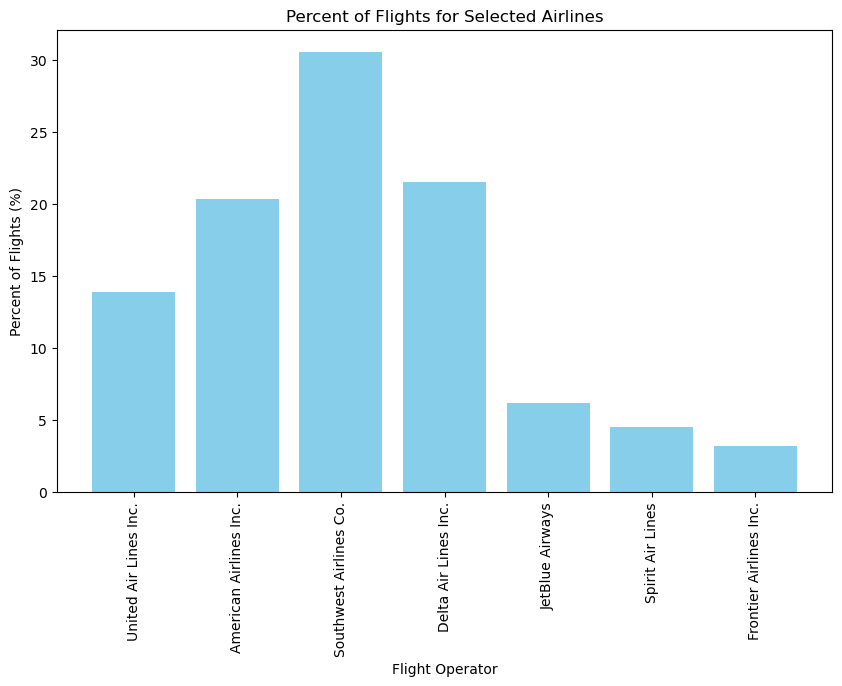

In [96]:
df = pd.read_csv('Merged10yrOperatordata2.csv')

operators_of_interest = [
    'Delta Air Lines Inc.',
    'American Airlines Inc.',
    'Southwest Airlines Co.',
    'Frontier Airlines Inc.',
    'Spirit Air Lines',
    'United Air Lines Inc.',
    'JetBlue Airways'
]

# Filter only for selected operators
df_filtered = df[df['Description'].isin(operators_of_interest)]

operator_flights = df_filtered.groupby('Description')['Sum(DEPARTURES_PERFORMED)'].sum().reset_index()

operator_flights = operator_flights.rename(columns={
    'Description': 'Operator',
    'Sum(DEPARTURES_PERFORMED)': 'Total_Departures'
})

total_flights = operator_flights['Total_Departures'].sum()

operator_flights['Flight_Percent'] = (operator_flights['Total_Departures'] / total_flights) * 100

#to match the percentage of incidents
manual_order = {
    'United Air Lines Inc.': 0,
    'American Airlines Inc.': 1,
    'Southwest Airlines Co.': 2,
    'Delta Air Lines Inc.': 3,
    'JetBlue Airways': 4,
    'Spirit Air Lines': 5,
    'Frontier Airlines Inc.': 6
}
operator_flights['Manual_Order'] = operator_flights['Operator'].map(manual_order)
operator_flights = operator_flights.sort_values('Manual_Order')

plt.figure(figsize=(10, 6))
plt.bar(operator_flights['Operator'], operator_flights['Flight_Percent'], color='skyblue')
plt.xlabel('Flight Operator')
plt.ylabel('Percent of Flights (%)')
plt.title('Percent of Flights for Selected Airlines')
plt.xticks(rotation=90)
plt.show()

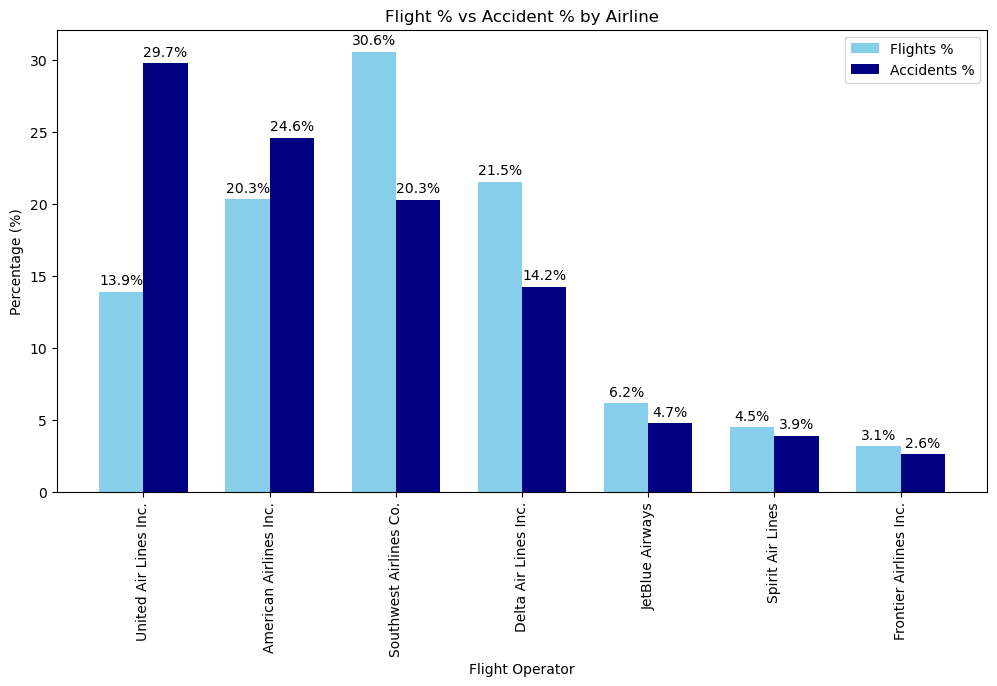

In [90]:
import numpy as np

x = np.arange(len(manual_order))

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - width/2, operator_flights['Flight_Percent'], width, label='Flights %', color='skyblue')
rects2 = ax.bar(x + width/2, select_accident_percentages.values, width, label='Accidents %', color='navy')

ax.set_xlabel('Flight Operator')
ax.set_ylabel('Percentage (%)')
ax.set_title('Flight % vs Accident % by Airline')
ax.set_xticks(x)
ax.set_xticklabels(manual_order, rotation=90)
ax.legend()

def annotate_bars(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

annotate_bars(rects1)
annotate_bars(rects2)

plt.show()

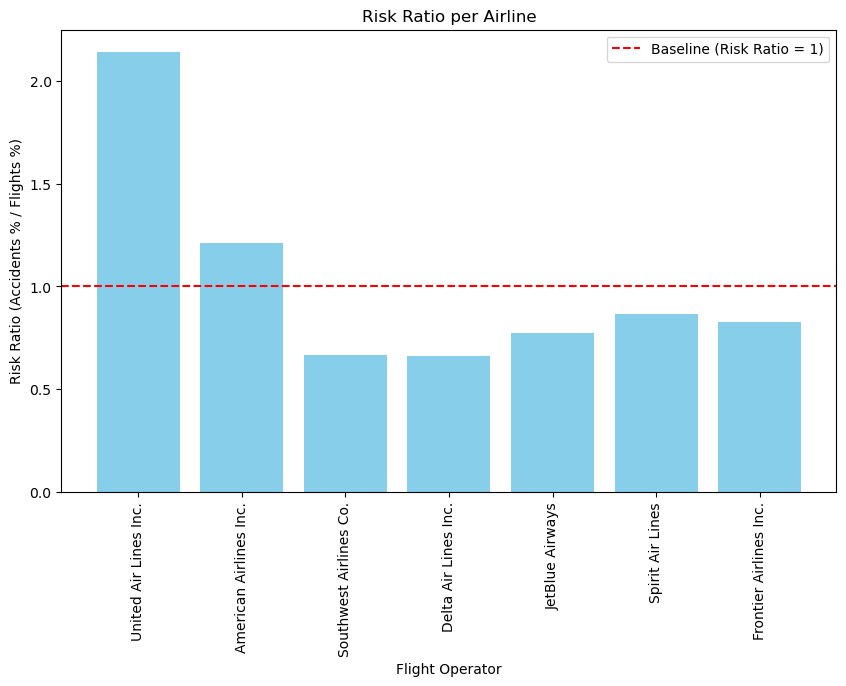

In [208]:
final_df = pd.DataFrame({
    'Flight_Percent': operator_flights['Flight_Percent'].values,
    'Accident_Percent': select_accident_percentages.values,
    'Flights_Count': operator_flights['Total_Departures'].values,
    'Accidents_Count': select_accident_counts.values,
}, index=operator_flights['Operator'])



# Calculate Risk Ratio
final_df['Risk_Ratio'] = final_df['Accident_Percent'] / final_df['Flight_Percent']

plt.figure(figsize=(10,6))
plt.bar(final_df.index, final_df['Risk_Ratio'], color='skyblue')
plt.axhline(y=1.0, color='red', linestyle='--', label='Baseline (Risk Ratio = 1)')
plt.xlabel('Flight Operator')
plt.ylabel('Risk Ratio (Accidents % / Flights %)')
plt.title('Risk Ratio per Airline')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [234]:
mean_rr = final_df['Risk_Ratio'].mean()
median_rr = final_df['Risk_Ratio'].median()
std_rr = final_df['Risk_Ratio'].std()

final_df['Rank'] = final_df['Risk_Ratio'].astype(float).rank(method='min', ascending=True).astype(int)
final_df = final_df.sort_values('Rank').reset_index(drop=True)
final_df['Z_Score'] = (final_df['Risk_Ratio'] - mean_rr) / std_rr

print(final_df[['Operator', 'Risk_Ratio', 'Z_Score', 'Rank']])

print('\n' + '-'*20 + ' Summary ' + '-'*20)
print(f"Mean Risk Ratio: {mean_rr:.2f}")
print(f"Median Risk Ratio: {median_rr:.2f}")
print(f"Standard Deviation: {std_rr:.2f}")

                 Operator  Risk_Ratio   Z_Score  Rank
0    Delta Air Lines Inc.    0.661113 -0.678770     1
1  Southwest Airlines Co.    0.663116 -0.674982     2
2         JetBlue Airways    0.770876 -0.471177     3
3  Frontier Airlines Inc.    0.824316 -0.370107     4
4        Spirit Air Lines    0.866912 -0.289547     5
5  American Airlines Inc.    1.210745  0.360739     6
6   United Air Lines Inc.    2.142973  2.123844     7

-------------------- Summary --------------------
Mean Risk Ratio: 1.02
Median Risk Ratio: 0.82
Standard Deviation: 0.53
